In [4]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import processing_netcdf as pcdf
import geopandas as gpd
from geopandas import GeoDataFrame
import shapely.geometry 
import numpy as np
from shapely import geometry as gmty
from geofeather import to_geofeather, from_geofeather
import glob
import os
import pyarrow
from xclim import ensembles as ens
from xclim import subset

In [14]:
import matplotlib.pyplot as plt

In [2]:
folder = "/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/"
out_folder = "/home/mlopez/EXEC/TimeMeansModels/"

# Select and open Region (Shapefile)

In [5]:
shapefile = ("/home/mlopez/EXEC/Shapefiles/DDE_STF_20K_REG_FOR_VUE_S.shp")
poly = gpd.read_file(shapefile)
poly= poly.to_crs('epsg:4326')
poly

,OBJECTID,NO_REG_FOR,NM_REG_FOR,NO_UG_RAF,SUP_KM2,DATE_PUBLI,Shape_Leng,Shape_Area,D_GENERAL,geometry
0,1,01,BAS-SAINT-LAURENT,"011, 012",27645.7,2019-11-30,1.018112e+06,2.743725e+10,Sud-est,"POLYGON ((-68.24266 48.85438, -68.18955 48.875..."
1,2,02,SAGUENAY -LAC-SAINT-JEAN,"023, 024, 025, 027",102315.5,2019-11-30,2.642611e+06,1.011782e+11,Nord-est,"POLYGON ((-71.02818 52.21282, -71.02784 52.213..."
2,3,03,CAPITALE-NATIONALE-CHAUDIÈRE-APPALACHES,"035, 037",35573.9,2019-11-30,1.295862e+06,3.544054e+10,Centre du Québec,"POLYGON ((-70.24926 46.12110, -70.24936 46.120..."
3,4,04,MAURICIE-CENTRE-DU-QUÉBEC,"041, 042",52443.7,2019-11-30,1.903121e+06,5.216317e+10,Centre du Québec,"POLYGON ((-72.70529 45.75959, -72.70536 45.759..."
4,5,05,ESTRIE-MONTÉRÉGIE-LAVAL-MONTRÉAL,"051, 052",23252.3,2019-11-30,1.123268e+06,2.330905e+10,Secteur métropolitain et sud,"POLYGON ((-72.27288 45.61310, -72.27288 45.613..."
5,6,07,OUTAOUAIS,"071, 072, 073, 074",39030.0,2019-11-30,1.677902e+06,3.893718e+10,Sud-ouest,"POLYGON ((-74.72535 45.85802, -74.72646 45.852..."
6,7,08,ABITIBI-TEMISCAMINGUE,"081, 082, 083, 084, 085, 086",57124.2,2019-11-30,1.961835e+06,5.674050e+10,Nord-ouest,"POLYGON ((-77.86075 46.21053, -77.86104 46.210..."
7,8,09,COTE-NORD,"093, 094, 097",379435.8,2019-11-30,5.360494e+06,3.744732e+11,Nord-est,"POLYGON ((-70.02990 52.89020, -67.32805 52.884..."
8,9,10,NORD-DU-QUEBEC,"102, 105, 106, 107",0.1,2019-11-30,1.858192e+03,1.456492e+05,Nord-ouest,"POLYGON ((-78.76555 48.69057, -78.76556 48.690..."
9,10,10,NORD-DU-QUEBEC,"102, 105, 106, 107",48.3,2019-11-30,3.542201e+04,4.789565e+07,Nord-ouest,"POLYGON ((-78.65906 48.69034, -78.66015 48.690..."


# Select variable

In [6]:
filesSeas =  glob.glob(folder+"*rcp85_tg_mean_seasonal.nc")
files = glob.glob(folder+"*rcp85_tg_mean_annual.nc")
#ex: ACCESS1-3_rcp45_tn_mean_annual.nc
print(files)
print(filesSeas)


['/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/ACCESS1-3_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/BNU-ESM_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CanESM2_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/CMCC-CMS_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/GFDL-ESM2M_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/HadGEM2-CC_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/INM-CM4_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5A-LR_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/IPSL-CM5B-LR_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/MPI-ESM-LR_rcp85_tg_mean_annual.nc', '/scen3/scenario/netcdf/ouranos/portraits-clim-2.0/NorESM1-M_rcp85_tg_mean_annual.nc']
['/scen3/scenario/netcdf/ouranos/portrai

# Open Mask if already created or create it. 

In [7]:
dsEns= ens.create_ensemble(files)
dsEnsSeas = ens.create_ensemble(filesSeas)
dsEns
if os.path.exists(shapefile.replace('.shp','.nc')):
    mask = xr.open_dataset(shapefile.replace('.shp','.nc'))
    mask = mask.__xarray_dataarray_variable__
    
else:
    mask= subset.create_mask(poly=poly, x_dim=dsEns.lon, y_dim=dsEns.lat)
    mask = mask.T
    mask.to_netcdf(shapefile.replace('.shp','.nc'))

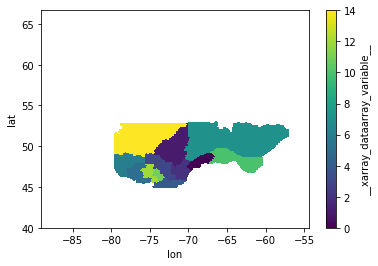

In [8]:
mask.plot()

# Figure - Time Series

In [27]:
# figure
dsEns = dsEns.assign_coords({'region':mask})
# spatial means - grouby region mask
out = dsEns.groupby(dsEns.region).mean()
print(out)
# Calculate ensembles percentiles on regional means
perctiles = ens.ensemble_percentiles(out)
perctiles

<xarray.Dataset>
Dimensions:      (realization: 11, region: 13, time: 151)
Coordinates:
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * time         (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * region       (region) float64 0.0 1.0 2.0 3.0 4.0 ... 10.0 11.0 12.0 14.0
Data variables:
    tg_mean      (region, realization, time) float32 dask.array<chunksize=(1, 1, 10), meta=np.ndarray>


<xarray.Dataset>
Dimensions:      (realization: 11, region: 13, time: 151)
Coordinates:
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * time         (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2100-01-01
  * region       (region) float64 0.0 1.0 2.0 3.0 4.0 ... 10.0 11.0 12.0 14.0
Data variables:
    tg_mean_p10  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    tg_mean_p50  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    tg_mean_p90  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>

In [59]:
%time dfper1 = perctiles.to_dataframe().dropna()
dfper1

CPU times: user 10.3 s, sys: 3.19 s, total: 13.5 s
Wall time: 9.19 s


tg_mean_p10  tg_mean_p50  tg_mean_p90
realization region time                                             
0           0.0    1950-01-01   274.173645   275.000122   276.100830
                   1951-01-01   274.230530   274.847229   275.270630
                   1952-01-01   274.470306   274.896759   276.606384
                   1953-01-01   274.439484   275.099884   275.847473
                   1954-01-01   274.307465   275.553436   276.537781
...                                    ...          ...          ...
10          14.0   2096-01-01   276.791534   279.467651   281.979309
                   2097-01-01   277.641296   280.397797   281.357239
                   2098-01-01   276.293152   279.683594   280.957123
                   2099-01-01   277.373260   278.787537   280.714386
                   2100-01-01   277.326080   279.434326   281.104980

[21593 rows x 3 columns]

In [60]:
dfper0 = dfper1.query("realization == 0")
dfper0

tg_mean_p10  tg_mean_p50  tg_mean_p90
realization region time                                             
0           0.0    1950-01-01   274.173645   275.000122   276.100830
                   1951-01-01   274.230530   274.847229   275.270630
                   1952-01-01   274.470306   274.896759   276.606384
                   1953-01-01   274.439484   275.099884   275.847473
                   1954-01-01   274.307465   275.553436   276.537781
...                                    ...          ...          ...
            14.0   2096-01-01   276.791534   279.467651   281.979309
                   2097-01-01   277.641296   280.397797   281.357239
                   2098-01-01   276.293152   279.683594   280.957123
                   2099-01-01   277.373260   278.787537   280.714386
                   2100-01-01   277.326080   279.434326   281.104980

[1963 rows x 3 columns]

In [70]:
dfper5 = dfper1.query("realization == 10")
dfper5

tg_mean_p10  tg_mean_p50  tg_mean_p90
realization region time                                             
10          0.0    1950-01-01   274.173645   275.000122   276.100830
                   1951-01-01   274.230530   274.847229   275.270630
                   1952-01-01   274.470306   274.896759   276.606384
                   1953-01-01   274.439484   275.099884   275.847473
                   1954-01-01   274.307465   275.553436   276.537781
...                                    ...          ...          ...
            14.0   2096-01-01   276.791534   279.467651   281.979309
                   2097-01-01   277.641296   280.397797   281.357239
                   2098-01-01   276.293152   279.683594   280.957123
                   2099-01-01   277.373260   278.787537   280.714386
                   2100-01-01   277.326080   279.434326   281.104980

[1963 rows x 3 columns]

In [58]:
%time dfper = perctiles.drop('realization').to_dataframe().dropna()
dfper

CPU times: user 9.72 s, sys: 3.04 s, total: 12.8 s
Wall time: 8.43 s


tg_mean_p10  tg_mean_p50  tg_mean_p90
region time                                             
0.0    1950-01-01   274.173645   275.000122   276.100830
       1951-01-01   274.230530   274.847229   275.270630
       1952-01-01   274.470306   274.896759   276.606384
       1953-01-01   274.439484   275.099884   275.847473
       1954-01-01   274.307465   275.553436   276.537781
...                        ...          ...          ...
14.0   2096-01-01   276.791534   279.467651   281.979309
       2097-01-01   277.641296   280.397797   281.357239
       2098-01-01   276.293152   279.683594   280.957123
       2099-01-01   277.373260   278.787537   280.714386
       2100-01-01   277.326080   279.434326   281.104980

[1963 rows x 3 columns]

In [71]:
dfmean = dfper.reset_index()
dfmean

,region,time,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,0.0,1950-01-01,274.173645,275.000122,276.100830
1,0.0,1951-01-01,274.230530,274.847229,275.270630
2,0.0,1952-01-01,274.470306,274.896759,276.606384
3,0.0,1953-01-01,274.439484,275.099884,275.847473
4,0.0,1954-01-01,274.307465,275.553436,276.537781
...,...,...,...,...,...
1958,14.0,2096-01-01,276.791534,279.467651,281.979309
1959,14.0,2097-01-01,277.641296,280.397797,281.357239
1960,14.0,2098-01-01,276.293152,279.683594,280.957123
1961,14.0,2099-01-01,277.373260,278.787537,280.714386


In [72]:
dfmean2 = dfmean.groupby(["time"]).mean()
dfmean2.reset_index()

,time,region,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,1950-01-01,6.461538,273.732065,274.461785,275.669581
1,1951-01-01,6.461538,273.577012,274.140336,274.634404
2,1952-01-01,6.461538,273.698937,274.301478,276.047915
3,1953-01-01,6.461538,273.720257,274.381397,275.762468
4,1954-01-01,6.461538,273.537884,274.691127,276.328719
...,...,...,...,...,...
146,2096-01-01,6.461538,280.279656,282.019064,284.331792
147,2097-01-01,6.461538,280.196190,282.715689,283.928098
148,2098-01-01,6.461538,279.344992,282.156508,283.189704
149,2099-01-01,6.461538,280.202698,281.634345,283.397076


In [ ]:
dfmean

In [73]:
def polysmooth(years, y, degree):
    coef = np.polyfit(years, y, degree)
    return np.polyval(coef,years)

In [74]:
years = dfmean2.reset_index().time.dt.year
#years

In [102]:
years.values

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026,
       2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037,
       2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048,
       2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059,
       2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070,
       2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081,
       2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092,
       2093, 2094, 2095, 2096, 2097, 2098, 2099, 21

In [75]:
dfmean2 = dfmean2.reset_index()

In [100]:
df2 = dfmean2.reset_index(time)

,time,region,tg_mean_p10,tg_mean_p50,tg_mean_p90
0,1950-01-01,6.461538,273.732065,274.461785,275.669581
1,1951-01-01,6.461538,273.577012,274.140336,274.634404
2,1952-01-01,6.461538,273.698937,274.301478,276.047915
3,1953-01-01,6.461538,273.720257,274.381397,275.762468
4,1954-01-01,6.461538,273.537884,274.691127,276.328719
...,...,...,...,...,...
146,2096-01-01,6.461538,280.279656,282.019064,284.331792
147,2097-01-01,6.461538,280.196190,282.715689,283.928098
148,2098-01-01,6.461538,279.344992,282.156508,283.189704
149,2099-01-01,6.461538,280.202698,281.634345,283.397076


In [99]:
dfmean2.to_csv("dfmean.csv")

In [101]:
rp1= polysmooth(years,dfmean2.tg_mean_p10 - 273.15,4)
rp5 = polysmooth(years,dfmean2.tg_mean_p50 - 273.15,4)
rp9 = polysmooth(years,dfmean2.tg_mean_p90 - 273.15,4)

## Create DF to plot TimeSeries graph in R

In [106]:
df = pd.DataFrame()
df["time"] = years.values


In [108]:
df["tg_mean_p10"] = rp1
df["tg_mean_p50"] = rp5
df["tg_mean_p90"] = rp9

### TODO:
- This dataframe should include both models (RCP 4.5 nad 8.5) and observations (historic)
- I should add labels and similar colors into the shiny graph

In [110]:
df.to_csv("p4tgmean.csv")

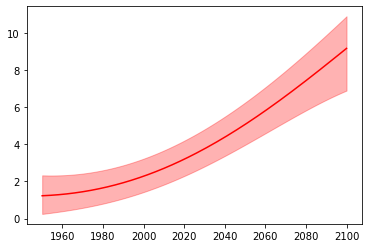

In [87]:
plt.plot(years, rp5, markersize='10', color='red')
plt.fill_between(years, polysmooth(years, dfmean2.tg_mean_p10- 273.15,4), polysmooth(years, dfmean2.tg_mean_p90- 273.15,4), alpha=0.3, color='red')

In [96]:
rp5

array([1.23012381, 1.23491015, 1.24030438, 1.24631154, 1.25293657,
       1.26018428, 1.26805937, 1.27656642, 1.2857099 , 1.29549416,
       1.30592344, 1.31700186, 1.32873343, 1.34112205, 1.35417149,
       1.36788541, 1.38226735, 1.39732076, 1.41304895, 1.42945511,
       1.44654233, 1.46431359, 1.48277174, 1.50191952, 1.52175955,
       1.54229435, 1.5635263 , 1.5854577 , 1.6080907 , 1.63142735,
       1.65546958, 1.68021922, 1.70567797, 1.73184741, 1.75872903,
       1.78632416, 1.81463407, 1.84365988, 1.87340259, 1.90386311,
       1.93504222, 1.96694058, 1.99955875, 2.03289715, 2.06695612,
       2.10173586, 2.13723646, 2.17345789, 2.21040002, 2.24806259,
       2.28644522, 2.32554744, 2.36536864, 2.40590811, 2.44716501,
       2.48913841, 2.53182723, 2.5752303 , 2.61934633, 2.66417392,
       2.70971153, 2.75595754, 2.80291019, 2.8505676 , 2.89892781,
       2.94798871, 2.99774808, 3.0482036 , 3.09935283, 3.1511932 ,
       3.20372204, 3.25693656, 3.31083386, 3.36541091, 3.42066

In [95]:
dfmean2.to_csv("timeseries.csv")

### NOTE: this example was for the whole region. 
### TODO: 
- Split DF by regions and get same graph for each region
- Convert degrees in Celsius

## Seasonal case

In [46]:
# Seasonal example
dsEnsSeas
dsEnsSeas = dsEnsSeas.assign_coords({'region':mask})
out = dsEnsSeas.groupby(dsEnsSeas.region).mean()
# Calculate ensembles percentiles on regional means
perSeas = ens.ensemble_percentiles(out)
perSeas

<xarray.Dataset>
Dimensions:      (realization: 11, region: 13, time: 605)
Coordinates:
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * time         (time) datetime64[ns] 1949-12-01 1950-03-01 ... 2100-12-01
  * region       (region) float64 0.0 1.0 2.0 3.0 4.0 ... 10.0 11.0 12.0 14.0
Data variables:
    tg_mean_p10  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    tg_mean_p50  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>
    tg_mean_p90  (region, time) float32 dask.array<chunksize=(1, 10), meta=np.ndarray>

In [91]:
%time dfperS = perSeas.drop('realization').to_dataframe().dropna()


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



CPU times: user 43.3 s, sys: 13.4 s, total: 56.6 s
Wall time: 39.4 s


In [92]:
dfperS

tg_mean_p10  tg_mean_p50  tg_mean_p90
region time                                             
0.0    1950-03-01   272.458618   273.629242   275.396149
       1950-06-01   287.901459   288.808258   289.632629
       1950-09-01   275.615906   276.791718   278.084320
       1950-12-01   259.065521   260.167236   260.980560
       1951-03-01   272.313660   273.987061   275.060883
...                        ...          ...          ...
14.0   2099-09-01   279.076874   281.841461   284.107208
       2099-12-01   263.411285   264.403778   268.403503
       2100-03-01   274.170776   278.490753   279.886566
       2100-06-01   290.725647   293.426544   296.018829
       2100-09-01   279.408142   282.295868   283.663361

[7839 rows x 3 columns]

### TODO: 
- Split by season (january, march, etc.) 4
- Split by sub region 13
- Convert degreen in Celsius
- Make graphs

# To create maps

In [47]:
# Mapping data - 30 year means
tmp1 = dsEns.sel(time=(dsEns.time.dt.year>=1981))
window = 30
time1 = tmp1.time[0::window]

ds30yavg = tmp1.coarsen(time=window).mean()
ds30yavg['time'] = time1
perc30yavg = ens.ensemble_percentiles(ds30yavg)
perc30yavg # entire grid

# Mapping data

0.0
<xarray.Dataset>
Dimensions:      (lat: 25, lon: 44, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 49.12401 49.04068 48.95735 ... 47.20742 47.12409
  * lon          (lon) float32 -70.1293 -70.04597 ... -66.62944 -66.54611
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 7.0 7.0 7.0 7.0 7.0 ... nan nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



1.0
<xarray.Dataset>
Dimensions:      (lat: 65, lon: 56, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 52.79053 52.7072 52.62387 ... 47.54074 47.45741
  * lon          (lon) float32 -74.37913 -74.2958 ... -69.87931 -69.79598
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 14.0 14.0 14.0 14.0 14.0 ... 0.0 0.0 0.0 0.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 65, 56), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 65, 56), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 65, 56), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



2.0
<xarray.Dataset>
Dimensions:      (lat: 31, lon: 34, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 48.29071 48.20738 48.12405 ... 45.87414 45.79081
  * lon          (lon) float32 -72.37921 -72.29588 ... -69.71265 -69.62932
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 ... nan nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 34), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 34), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 34), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



3.0
<xarray.Dataset>
Dimensions:      (lat: 42, lon: 49, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 49.04068 48.95735 48.87402 ... 45.70748 45.62415
  * lon          (lon) float32 -75.46242 -75.37909 ... -71.54591 -71.46258
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 14.0 3.0 3.0 14.0 14.0 ... 4.0 4.0 4.0 4.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 42, 49), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 42, 49), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 42, 49), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



4.0
<xarray.Dataset>
Dimensions:      (lat: 13, lon: 50, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 46.0408 45.95747 45.87414 ... 45.12417 45.04084
  * lon          (lon) float32 -74.54579 -74.46246 ... -70.54595 -70.46262
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 12.0 12.0 12.0 12.0 12.0 ... nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 50), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 50), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 50), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



5.0
<xarray.Dataset>
Dimensions:      (lat: 31, lon: 39, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 47.95739 47.87406 47.79073 ... 45.54082 45.45749
  * lon          (lon) float32 -77.87899 -77.79566 ... -74.79578 -74.71245
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 6.0 6.0 6.0 6.0 6.0 ... nan nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 39), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 39), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 39), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



6.0
<xarray.Dataset>
Dimensions:      (lat: 39, lon: 49, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 49.45733 49.374 49.29067 ... 46.37412 46.29079
  * lon          (lon) float32 -79.54559 -79.46226 ... -75.62908 -75.54575
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan 14.0 14.0 14.0 ... 5.0 12.0 12.0 12.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 39, 49), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 39, 49), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 39, 49), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



7.0
<xarray.Dataset>
Dimensions:      (lat: 59, lon: 162, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 52.95719 52.87386 52.79053 ... 48.20738 48.12405
  * lon          (lon) float32 -70.46262 -70.37929 ... -57.12982 -57.04649
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 59, 162), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 59, 162), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 59, 162), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



9.0
<xarray.Dataset>
Dimensions:      (lat: 1, lon: 1, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 48.70736
  * lon          (lon) float32 -78.71229
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 9.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



10.0
<xarray.Dataset>
Dimensions:      (lat: 35, lon: 82, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 49.70732 49.62399 49.54066 ... 46.95743 46.8741
  * lon          (lon) float32 -67.21275 -67.12942 ... -60.54635 -60.46302
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 7.0 7.0 7.0 7.0 7.0 ... nan nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 82), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 82), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 82), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



11.0
<xarray.Dataset>
Dimensions:      (lat: 19, lon: 21, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 47.20742 47.12409 47.04076 ... 45.79081 45.70748
  * lon          (lon) float32 -74.62912 -74.54579 ... -73.04585 -72.96252
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 12.0 12.0 3.0 3.0 3.0 ... 4.0 4.0 4.0 4.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 21), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 21), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 21), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



12.0
<xarray.Dataset>
Dimensions:      (lat: 28, lon: 29, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 47.7074 47.62407 47.54074 ... 45.54082 45.45749
  * lon          (lon) float32 -76.12906 -76.04573 ... -73.87915 -73.79582
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 5.0 5.0 5.0 5.0 5.0 ... 4.0 12.0 4.0 4.0 4.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 29), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 29), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 29), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



14.0
<xarray.Dataset>
Dimensions:      (lat: 51, lon: 112, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 52.79053 52.7072 52.62387 ... 48.70736 48.62403
  * lon          (lon) float32 -79.46226 -79.37893 ... -70.29596 -70.21263
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... 1.0 1.0 1.0 7.0 7.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



In [144]:
# select data for individual regions
reg_ids = np.unique(mask.values)
reg_ids = reg_ids[np.where(~np.isnan(reg_ids))]
listRegions = []
for r in reg_ids:
    print(r)
    if ~np.isnan(r):
        reg = perc30yavg.where(mask==r, drop=True)
        print(reg)
        df = reg.drop('realization').to_dataframe().dropna()
        listRegions.append(df)
        # export ot netcdf?

0.0
<xarray.Dataset>
Dimensions:      (lat: 25, lon: 44, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 49.12401 49.04068 48.95735 ... 47.20742 47.12409
  * lon          (lon) float32 -70.1293 -70.04597 ... -66.62944 -66.54611
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 7.0 7.0 7.0 7.0 7.0 ... nan nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 25, 44), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



1.0
<xarray.Dataset>
Dimensions:      (lat: 65, lon: 56, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 52.79053 52.7072 52.62387 ... 47.54074 47.45741
  * lon          (lon) float32 -74.37913 -74.2958 ... -69.87931 -69.79598
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 14.0 14.0 14.0 14.0 14.0 ... 0.0 0.0 0.0 0.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 65, 56), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 65, 56), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 65, 56), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



2.0
<xarray.Dataset>
Dimensions:      (lat: 31, lon: 34, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 48.29071 48.20738 48.12405 ... 45.87414 45.79081
  * lon          (lon) float32 -72.37921 -72.29588 ... -69.71265 -69.62932
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 ... nan nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 34), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 34), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 34), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



3.0
<xarray.Dataset>
Dimensions:      (lat: 42, lon: 49, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 49.04068 48.95735 48.87402 ... 45.70748 45.62415
  * lon          (lon) float32 -75.46242 -75.37909 ... -71.54591 -71.46258
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 14.0 3.0 3.0 14.0 14.0 ... 4.0 4.0 4.0 4.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 42, 49), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 42, 49), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 42, 49), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



4.0
<xarray.Dataset>
Dimensions:      (lat: 13, lon: 50, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 46.0408 45.95747 45.87414 ... 45.12417 45.04084
  * lon          (lon) float32 -74.54579 -74.46246 ... -70.54595 -70.46262
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 12.0 12.0 12.0 12.0 12.0 ... nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 50), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 50), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 13, 50), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



5.0
<xarray.Dataset>
Dimensions:      (lat: 31, lon: 39, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 47.95739 47.87406 47.79073 ... 45.54082 45.45749
  * lon          (lon) float32 -77.87899 -77.79566 ... -74.79578 -74.71245
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 6.0 6.0 6.0 6.0 6.0 ... nan nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 39), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 39), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 31, 39), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



6.0
<xarray.Dataset>
Dimensions:      (lat: 39, lon: 49, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 49.45733 49.374 49.29067 ... 46.37412 46.29079
  * lon          (lon) float32 -79.54559 -79.46226 ... -75.62908 -75.54575
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan 14.0 14.0 14.0 ... 5.0 12.0 12.0 12.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 39, 49), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 39, 49), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 39, 49), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



7.0
<xarray.Dataset>
Dimensions:      (lat: 59, lon: 162, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 52.95719 52.87386 52.79053 ... 48.20738 48.12405
  * lon          (lon) float32 -70.46262 -70.37929 ... -57.12982 -57.04649
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 59, 162), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 59, 162), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 59, 162), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



9.0
<xarray.Dataset>
Dimensions:      (lat: 1, lon: 1, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 48.70736
  * lon          (lon) float32 -78.71229
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 9.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



10.0
<xarray.Dataset>
Dimensions:      (lat: 35, lon: 82, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 49.70732 49.62399 49.54066 ... 46.95743 46.8741
  * lon          (lon) float32 -67.21275 -67.12942 ... -60.54635 -60.46302
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 7.0 7.0 7.0 7.0 7.0 ... nan nan nan nan nan
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 82), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 82), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 35, 82), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



11.0
<xarray.Dataset>
Dimensions:      (lat: 19, lon: 21, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 47.20742 47.12409 47.04076 ... 45.79081 45.70748
  * lon          (lon) float32 -74.62912 -74.54579 ... -73.04585 -72.96252
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 12.0 12.0 3.0 3.0 3.0 ... 4.0 4.0 4.0 4.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 21), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 21), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 19, 21), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



12.0
<xarray.Dataset>
Dimensions:      (lat: 28, lon: 29, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 47.7074 47.62407 47.54074 ... 45.54082 45.45749
  * lon          (lon) float32 -76.12906 -76.04573 ... -73.87915 -73.79582
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 5.0 5.0 5.0 5.0 5.0 ... 4.0 12.0 4.0 4.0 4.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 29), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 29), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 28, 29), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



14.0
<xarray.Dataset>
Dimensions:      (lat: 51, lon: 112, realization: 11, time: 4)
Coordinates:
  * lat          (lat) float32 52.79053 52.7072 52.62387 ... 48.70736 48.62403
  * lon          (lon) float32 -79.46226 -79.37893 ... -70.29596 -70.21263
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... 1.0 1.0 1.0 7.0 7.0
Data variables:
    tg_mean_p10  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>
    tg_mean_p50  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>
    tg_mean_p90  (time, lat, lon) float32 dask.array<chunksize=(1, 51, 112), meta=np.ndarray>


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



## Example for Region 1

In [146]:
Region1 = listRegions[1]
Region1i = Region1.reset_index()

In [147]:
Region1i

,lat,lon,time,tg_mean_p10,tg_mean_p50,tg_mean_p90,region
0,52.790531,-70.129303,1981-01-01,269.758575,269.859589,270.131927,1.0
1,52.790531,-70.129303,2011-01-01,270.621002,271.159241,271.937225,1.0
2,52.790531,-70.129303,2041-01-01,272.319489,273.171783,274.123016,1.0
3,52.790531,-70.129303,2071-01-01,273.499847,276.050201,277.139648,1.0
4,52.790531,-70.045967,1981-01-01,269.879547,269.979675,270.249695,1.0
...,...,...,...,...,...,...,...
7391,47.540741,-71.629242,2071-01-01,277.884979,279.666565,280.679321,1.0
7392,47.457409,-71.629242,1981-01-01,273.872894,273.953949,274.145111,1.0
7393,47.457409,-71.629242,2011-01-01,274.766602,275.260559,275.837372,1.0
7394,47.457409,-71.629242,2041-01-01,276.712524,277.089508,277.907654,1.0


## Merge data with polygons mask

In [150]:
Region1poly = pd.merge(Region1i, dfpolyshape, on=["lat","lon"])
Region1poly

,lat,lon,time,tg_mean_p10,tg_mean_p50,tg_mean_p90,region,TER_GUIDE,geometry
0,52.207218,-70.795937,1981-01-01,269.403534,269.491150,269.790344,1.0,6opqr,"POLYGON ((-70.75427 52.20463, -70.75427 52.165..."
1,52.207218,-70.795937,2011-01-01,270.278839,270.818665,271.569153,1.0,6opqr,"POLYGON ((-70.75427 52.20463, -70.75427 52.165..."
2,52.207218,-70.795937,2041-01-01,271.961517,272.754272,273.747009,1.0,6opqr,"POLYGON ((-70.75427 52.20463, -70.75427 52.165..."
3,52.207218,-70.795937,2071-01-01,273.138519,275.653290,276.760681,1.0,6opqr,"POLYGON ((-70.75427 52.20463, -70.75427 52.165..."
4,52.207218,-70.712608,1981-01-01,269.483765,269.570740,269.868164,1.0,6opqr,"POLYGON ((-70.75427 52.16555, -70.75427 52.204..."
...,...,...,...,...,...,...,...,...,...
8967,47.540741,-71.629242,2071-01-01,277.884979,279.666565,280.679321,1.0,5ef,"POLYGON ((-71.67091 47.49907, -71.67091 47.582..."
8968,47.457409,-71.629242,1981-01-01,273.872894,273.953949,274.145111,1.0,5ef,"POLYGON ((-71.67091 47.41574, -71.67091 47.499..."
8969,47.457409,-71.629242,2011-01-01,274.766602,275.260559,275.837372,1.0,5ef,"POLYGON ((-71.67091 47.41574, -71.67091 47.499..."
8970,47.457409,-71.629242,2041-01-01,276.712524,277.089508,277.907654,1.0,5ef,"POLYGON ((-71.67091 47.41574, -71.67091 47.499..."


In [ ]:
gdf2050p1.to_file(tg['TER_GUIDE'].iloc[0]+"_2050_tg_mean_annual_rcp85_10.json", driver="GeoJSON"

### TODO: 

- Create "for loop" to create a DF for each group of regions
- Split by time period (3) - not necessary 
- Split by percentiles - not necessary 
- Merge with the poly DF to get all the rest of the data (notably names of the regions) - Not necessary, just add a column with the name? - MAKE A DICTIONARY
- Beware: find a way to merge, given that poly doesn't have lat long
- Beware: there's no region 8 and 13. They are too small
- Merge with polyshape to create geojson:

dfpolyshape = from_geofeather('Grid-TerritoiresGuides.feather')
dftg2050TGp1 = pd.merge(dfC12050, dfpolyshape, on=["lat","lon"])
dftg2050TGp1
for tg in listTG2050p1:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2050p1 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    print (tg['TER_GUIDE'].iloc[0])
    gdf2050p1.to_file(tg['TER_GUIDE'].iloc[0]+"_2050_tg_mean_annual_rcp85_10.json", driver="GeoJSON")
    

In [ ]:
%time dfper = perctiles.to_dataframe().dropna()
dfper

In [12]:
# Seasonal example 30 y means
for s in dsEnsSeas.time.dt.season:
    
    tmp1 = dsEnsSeas.sel(time=(dsEnsSeas.time.dt.year>=1981))
    tmp1 = tmp1.sel(time=(tmp1.time.dt.season==s))
    print(tmp1)
    
    # .... same as annual above
    



<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-03-01 1982-03-01 ... 2100-03-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 2, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-03-01 1982-03-01 ... 2100-03-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 2, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-09-01 1982-09-01 ... 2100-09-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-06-01 1982-06-01 ... 2100-06-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 416, realization: 11, time: 120)
Coordinates:
  * lat          (lat) float32 66.62331 66.53998 66.45665 ... 40.12437 40.04104
  * lon          (lon) float32 -89.04521 -88.96188 ... -54.54659 -54.46326
  * time         (time) datetime64[ns] 1981-12-01 1982-12-01 ... 2100-12-01
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
    region       (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Data variables:
    tg_mean      (realization, time, lat, lon) float32 dask.array<chunksize=(1, 1, 320, 416), meta=np.ndarray>
Attributes:
    Conventions:     CF-1.5
    title:           ACCESS1-3 model output prepared for CMIP5 historical
    history:         CMIP5 compliant file produced from raw ACCESS model outp...
    institution:     CSIRO (Commonwealth Scientific and Industrial Research O...
    source:          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-point, 1...
    redistribution:  Redistribution prohibited. F

# To create the Table

In [54]:
# Table 
# Similar to maps but with spatial avg as well

dsEns = dsEns.assign_coords({'region':mask})

# Mapping data - 30 year means
tmp1 = dsEns.sel(time=(dsEns.time.dt.year>=1981))
window = 30
time1 = tmp1.time[0::window]

# 30 y means
ds30yavgTable = tmp1.coarsen(time=window).mean()
ds30yavgTable['time'] = time1

# spatial mean
ds30yavgTable = ds30yavgTable.groupby(ds30yavgTable.region).mean()

perc30yavgTable = ens.ensemble_percentiles(ds30yavgTable)
perc30yavgTable 


<xarray.Dataset>
Dimensions:      (realization: 11, region: 13, time: 4)
Coordinates:
  * realization  (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * time         (time) datetime64[ns] 1981-01-01 2011-01-01 ... 2071-01-01
  * region       (region) float64 0.0 1.0 2.0 3.0 4.0 ... 10.0 11.0 12.0 14.0
Data variables:
    tg_mean_p10  (region, time) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    tg_mean_p50  (region, time) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    tg_mean_p90  (region, time) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>

In [79]:
%time dfperT = perc30yavgTable.drop('realization').to_dataframe().dropna()


  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)

  x = np.divide(x1, x2, out)



CPU times: user 1min 13s, sys: 10min 35s, total: 11min 48s
Wall time: 9.5 s


In [81]:
dfperT.head()

tg_mean_p10  tg_mean_p50  tg_mean_p90
region time                                             
0.0    1981-01-01   275.938629   275.979034   276.177399
       2011-01-01   276.776093   277.254425   277.900269
       2041-01-01   278.462677   279.105682   280.052002
       2071-01-01   279.652985   281.866394   282.948700
1.0    1981-01-01   272.926788   273.026886   273.270935

In [82]:
dfReg1T = dfperT.query("region==0.0")
dfReg1T

tg_mean_p10  tg_mean_p50  tg_mean_p90
region time                                             
0.0    1981-01-01   275.938629   275.979034   276.177399
       2011-01-01   276.776093   277.254425   277.900269
       2041-01-01   278.462677   279.105682   280.052002
       2071-01-01   279.652985   281.866394   282.948700

# TODO
- This data (cell below) is only for one cell of the table, make for the other 2 periods ans 2 scenarios for every region

In [85]:
dfReg1T1980 = dfReg1T.query("time=='1981-01-01'")
dfReg1T1980

,,tg_mean_p10,tg_mean_p50,tg_mean_p90
region,time,,,
0.0,1981-01-01,275.938629,275.979034,276.177399


In [111]:
dfReg1T2041= dfReg1T.query("time=='2041-01-01'")
dfReg1T2041

,,tg_mean_p10,tg_mean_p50,tg_mean_p90
region,time,,,
0.0,2041-01-01,278.462677,279.105682,280.052002


In [112]:
dfReg1T2071 = dfReg1T.query("time=='2071-01-01'")
dfReg1T2071

,,tg_mean_p10,tg_mean_p50,tg_mean_p90
region,time,,,
0.0,2071-01-01,279.652985,281.866394,282.9487


In [113]:
col1 = ["Annuel","Percentiles (10 - 90)","Hiver","Percentiles (10 - 90)","Printemps","Percentiles (10 - 90)",
        "Ete","Percentiles (10 - 90)","Automne","Percentiles (10 - 90)"]

In [115]:
dfTable = pd.DataFrame()
dfTable["Saison"] = col1

In [120]:
dfTable

,Saison
0,Annuel
1,Percentiles (10 - 90)
2,Hiver
3,Percentiles (10 - 90)
4,Printemps
5,Percentiles (10 - 90)
6,Ete
7,Percentiles (10 - 90)
8,Automne
9,Percentiles (10 - 90)


In [118]:
dfReg1T1980.tg_mean_p50[0]

time
1981-01-01    275.979034
Name: tg_mean_p50, dtype: float64

In [142]:
dfTable["1981-2010"] = [dfReg1T1980.tg_mean_p50.values[0], (str(round(dfReg1T1980.tg_mean_p10.values[0],2))
                                                            +" - "+str(round(dfReg1T1980.tg_mean_p90.values[0],2))),str(1)+"-"+str(99),2,3,4,5,6,7,8]
dft2 = dfTable.set_index("Saison")

In [143]:
dft2.to_csv('dfTable.csv')

In [19]:
df.to_feather(out_folder + "df_tgrcp85_annual_11models.feather")

In [5]:
df = pd.read_feather("/home/mlopez/EXEC/TimeMeansModels/df_tgrcp85_annual_11models.feather", columns=None, use_threads=True);

In [20]:
df

,lat,lon,model,time,tg_mean
0,66.623306,-89.045212,0,1950-01-01,258.826111
1,66.623306,-89.045212,0,1951-01-01,258.880676
2,66.623306,-89.045212,0,1952-01-01,258.705017
3,66.623306,-89.045212,0,1953-01-01,258.466431
4,66.623306,-89.045212,0,1954-01-01,259.760803
...,...,...,...,...,...
126578161,40.041039,-74.045807,10,2096-01-01,289.984100
126578162,40.041039,-74.045807,10,2097-01-01,290.481293
126578163,40.041039,-74.045807,10,2098-01-01,290.068420
126578164,40.041039,-74.045807,10,2099-01-01,290.675110


# Split 11 models by periods 

In [9]:
year_groups = {y:0 for y in range(1980,2011)}
year_groups.update({y:1 for y in range(2041,2071)})
year_groups.update({y:2 for y in range(2071,2101)})

#takes 2 min
%time dfp = df2.groupby([df2.time.dt.year.map(year_groups), "lat","lon", "model"]).mean()

CPU times: user 1min 18s, sys: 7min 20s, total: 8min 38s
Wall time: 1min 42s


In [11]:
dfp.reset_index()

,time,lat,lon,model,index,tg_mean
0,0.0,40.041039,-89.045212,0,126277570.0,284.640381
1,0.0,40.041039,-89.045212,1,126277721.0,284.770447
2,0.0,40.041039,-89.045212,2,126277872.0,284.807953
3,0.0,40.041039,-89.045212,3,126278023.0,284.823608
4,0.0,40.041039,-89.045212,4,126278174.0,284.731598
...,...,...,...,...,...,...
2514793,2.0,66.623306,-61.296322,6,373105.5,266.407166
2514794,2.0,66.623306,-61.296322,7,373256.5,269.896942
2514795,2.0,66.623306,-61.296322,8,373407.5,269.994873
2514796,2.0,66.623306,-61.296322,9,373558.5,269.326660


In [12]:
dfp.drop(columns=['index'])

tg_mean
time lat       lon        model            
0.0  40.041039 -89.045212 0      284.640381
                          1      284.770447
                          2      284.807953
                          3      284.823608
                          4      284.731598
...                                     ...
2.0  66.623306 -61.296322 6      266.407166
                          7      269.896942
                          8      269.994873
                          9      269.326660
                          10     269.428772

[2514798 rows x 1 columns]

In [50]:
df2050 = dfp.query("time==1.0").reset_index()
df2080 = dfp.query("time==2.0").reset_index()

In [51]:
df20501 = df2050.drop(columns=['index'])
df20801 = df2080.drop(columns=['index'])

In [45]:
df20501

,time,lat,lon,model,tg_mean
0,1.0,40.041039,-89.045212,0,287.573822
1,1.0,40.041039,-89.045212,1,287.898254
2,1.0,40.041039,-89.045212,2,287.897919
3,1.0,40.041039,-89.045212,3,288.027100
4,1.0,40.041039,-89.045212,4,286.441010
...,...,...,...,...,...
838261,1.0,66.623306,-61.296322,6,264.648468
838262,1.0,66.623306,-61.296322,7,267.856171
838263,1.0,66.623306,-61.296322,8,267.888397
838264,1.0,66.623306,-61.296322,9,267.233704


# Get the 3 percentiles for 11 models for 2 periods

In [38]:
#10:42:18 - 10:53:13 = 10 min 47s
%time dftgm2 = dfp.reset_index().groupby(["lat", "lon", "time"]).quantile([0.1,0.5,0.9]) 


CPU times: user 4min 41s, sys: 19.6 s, total: 5min 1s
Wall time: 12.5 s


In [39]:
dftgm2

model        index     tg_mean
lat       lon        time                                    
40.041039 -89.045212 0.0  0.1    1.0  126277721.0  284.620819
                          0.5    5.0  126278325.0  284.770447
                          0.9    9.0  126278929.0  284.817078
                     1.0  0.1    1.0  126277781.5  286.659210
                          0.5    5.0  126278385.5  287.839142
...                              ...          ...         ...
66.623306 -61.296322 1.0  0.5    5.0     372924.5  267.828003
                          0.9    9.0     373528.5  268.276093
                     2.0  0.1    1.0     372350.5  267.468475
                          0.5    5.0     372954.5  269.896942
                          0.9    9.0     373558.5  270.860626

[685854 rows x 3 columns]

## Percentiles for 2050

In [48]:
#takes 3 seconds
%time dftgm2050 = df20501.reset_index().groupby(["lat", "lon"]).quantile([0.1,0.5,0.9]) 

CPU times: user 1min 20s, sys: 4.78 s, total: 1min 25s
Wall time: 2.43 s


In [49]:
dftgm2050

index  time  model     tg_mean
lat       lon                                              
40.041039 -89.045212 0.1       1.0   1.0    1.0  286.659210
                     0.5       5.0   1.0    5.0  287.839142
                     0.9       9.0   1.0    9.0  288.027100
          -88.961884 0.1      12.0   1.0    1.0  286.639893
                     0.5      16.0   1.0    5.0  287.819672
...                            ...   ...    ...         ...
66.623306 -61.379650 0.5  838249.0   1.0    5.0  267.221313
                     0.9  838253.0   1.0    9.0  267.726227
          -61.296322 0.1  838256.0   1.0    1.0  266.553040
                     0.5  838260.0   1.0    5.0  267.828003
                     0.9  838264.0   1.0    9.0  268.276093

[228618 rows x 4 columns]

## Percentiles for 2080

In [52]:
%time dftgm2080 = df20801.reset_index().groupby(["lat", "lon"]).quantile([0.1,0.5,0.9]) 

CPU times: user 1min 22s, sys: 4.19 s, total: 1min 26s
Wall time: 2.42 s


In [109]:
df20801

,time,lat,lon,model,tg_mean
0,2.0,40.041039,-89.045212,0,289.429352
1,2.0,40.041039,-89.045212,1,290.146240
2,2.0,40.041039,-89.045212,2,289.981934
3,2.0,40.041039,-89.045212,3,289.810089
4,2.0,40.041039,-89.045212,4,287.945221
...,...,...,...,...,...
838261,2.0,66.623306,-61.296322,6,266.407166
838262,2.0,66.623306,-61.296322,7,269.896942
838263,2.0,66.623306,-61.296322,8,269.994873
838264,2.0,66.623306,-61.296322,9,269.326660


In [ ]:
P

## Split DF by percentiles

### For 2050

In [64]:
dfq12050 = dftgm2050.query("model == 1.0")

dfq52050 = dftgm2050.query("model == 5.0")

dfq92050 = dftgm2050.query("model == 9.0")

### For 2080

In [60]:
dfq12080 = dftgm2080.query("model == 1.0")

dfq52080 = dftgm2080.query("model == 5.0")

dfq92080 = dftgm2080.query("model == 9.0")

In [59]:
dfq12080

index  time  model     tg_mean
lat       lon                                              
40.041039 -89.045212 0.1       1.0   2.0    1.0  287.945221
          -88.961884 0.1      12.0   2.0    1.0  287.928162
          -88.878548 0.1      23.0   2.0    1.0  287.919922
          -88.795219 0.1      34.0   2.0    1.0  287.899933
          -88.711891 0.1      45.0   2.0    1.0  287.919708
...                            ...   ...    ...         ...
66.623306 -61.629639 0.1  838212.0   2.0    1.0  266.877563
          -61.546310 0.1  838223.0   2.0    1.0  266.571625
          -61.462978 0.1  838234.0   2.0    1.0  266.784515
          -61.379650 0.1  838245.0   2.0    1.0  266.860474
          -61.296322 0.1  838256.0   2.0    1.0  267.468475

[76206 rows x 4 columns]

# Transform temp to Celsius

In [65]:
dfC12050 = dfq12050.copy()
dfC12050["tg_mean"] = dfC12050["tg_mean"] -273.15

dfC52050 = dfq52050.copy()
dfC52050["tg_mean"] = dfC52050["tg_mean"] -273.15

dfC92050 = dfq92050.copy()
dfC92050["tg_mean"] = dfC92050["tg_mean"] -273.15

In [62]:
dfC12080 = dfq12080.copy()
dfC12080["tg_mean"] = dfC12080["tg_mean"] -273.15

dfC52080 = dfq52080.copy()
dfC52080["tg_mean"] = dfC52080["tg_mean"] -273.15

dfC92080 = dfq92080.copy()
dfC92080["tg_mean"] = dfC92080["tg_mean"] -273.15


In [63]:
dfC12080

index  time  model    tg_mean
lat       lon                                             
40.041039 -89.045212 0.1       1.0   2.0    1.0  14.795221
          -88.961884 0.1      12.0   2.0    1.0  14.778162
          -88.878548 0.1      23.0   2.0    1.0  14.769922
          -88.795219 0.1      34.0   2.0    1.0  14.749933
          -88.711891 0.1      45.0   2.0    1.0  14.769708
...                            ...   ...    ...        ...
66.623306 -61.629639 0.1  838212.0   2.0    1.0  -6.272437
          -61.546310 0.1  838223.0   2.0    1.0  -6.578375
          -61.462978 0.1  838234.0   2.0    1.0  -6.365485
          -61.379650 0.1  838245.0   2.0    1.0  -6.289526
          -61.296322 0.1  838256.0   2.0    1.0  -5.681525

[76206 rows x 4 columns]

## Import dataframe with polygons

In [148]:
dfpolyshape = from_geofeather('Grid-TerritoiresGuides.feather')

  warnings.warn(



In [149]:
dfpolyshape

,lat,lon,TER_GUIDE,geometry
0,52.957191,-67.712730,6opqr,"POLYGON ((-67.67107 52.93424, -67.67107 52.915..."
1,52.957191,-67.629402,6opqr,"POLYGON ((-67.67107 52.91553, -67.67107 52.934..."
2,52.957191,-67.546066,6opqr,"POLYGON ((-67.56730 52.91553, -67.57974 52.915..."
3,52.873859,-67.796059,6opqr,"POLYGON ((-67.75439 52.89329, -67.75439 52.832..."
4,52.873859,-67.712730,6opqr,"POLYGON ((-67.75439 52.83219, -67.75439 52.893..."
...,...,...,...,...
33193,45.041668,-72.208336,2c,"POLYGON ((-72.25000 45.00450, -72.25000 45.083..."
33194,45.041668,-72.125000,2c,"POLYGON ((-72.16666 45.00508, -72.16666 45.083..."
33195,45.041668,-72.041672,2c,"POLYGON ((-72.08334 45.00564, -72.08334 45.083..."
33196,45.041668,-71.958336,2c,"POLYGON ((-72.00000 45.00667, -72.00000 45.083..."


# Merge data with mask 

## Period 2041-2071

In [68]:
# Percentile 10
dftg2050TGp1 = pd.merge(dfC12050, dfpolyshape, on=["lat","lon"])
dftg2050TGp1

,lat,lon,index,time,model,tg_mean,TER_GUIDE,geometry
0,44.957512,-74.629120,132980.0,1.0,1.0,9.708521,1a,"POLYGON ((-74.62590 44.99918, -74.58746 44.999..."
1,44.957512,-74.545792,132991.0,1.0,1.0,9.678064,1a,"POLYGON ((-74.58746 44.99876, -74.58746 44.999..."
2,44.957512,-74.462463,133002.0,1.0,1.0,9.649530,1a,"POLYGON ((-74.50413 44.99784, -74.50413 44.999..."
3,44.957512,-74.379128,133013.0,1.0,1.0,9.629816,1a,"POLYGON ((-74.42079 44.99530, -74.42079 44.999..."
4,44.957512,-74.295799,133024.0,1.0,1.0,9.587091,1a,"POLYGON ((-74.33746 44.99215, -74.33746 44.999..."
...,...,...,...,...,...,...,...,...
16563,52.873859,-67.629402,481372.0,1.0,1.0,-0.618201,6opqr,"POLYGON ((-67.67107 52.83219, -67.67107 52.915..."
16564,52.873859,-67.546066,481383.0,1.0,1.0,-0.567572,6opqr,"POLYGON ((-67.58773 52.83219, -67.58773 52.904..."
16565,52.957191,-67.712730,485508.0,1.0,1.0,-0.757025,6opqr,"POLYGON ((-67.67107 52.93424, -67.67107 52.915..."
16566,52.957191,-67.629402,485519.0,1.0,1.0,-0.657874,6opqr,"POLYGON ((-67.67107 52.91553, -67.67107 52.934..."


In [69]:
dftg2050TGp5 = pd.merge(dfC52050, dfpolyshape, on=["lat","lon"])
dftg2050TGp9 = pd.merge(dfC92050, dfpolyshape, on=["lat","lon"])

## Period 2071-2100

In [96]:
dftg2080TGp1 = pd.merge(dfC12080, dfpolyshape, on=["lat","lon"])
dftg2080TGp5 = pd.merge(dfC52080, dfpolyshape, on=["lat","lon"])

In [97]:
dftg2080TGp9 = pd.merge(dfC92080, dfpolyshape, on=["lat","lon"])
dftg2080TGp9

,lat,lon,index,time,model,tg_mean,TER_GUIDE,geometry
0,44.957512,-74.629120,132988.0,2.0,9.0,13.897089,1a,"POLYGON ((-74.62590 44.99918, -74.58746 44.999..."
1,44.957512,-74.545792,132999.0,2.0,9.0,13.869989,1a,"POLYGON ((-74.58746 44.99876, -74.58746 44.999..."
2,44.957512,-74.462463,133010.0,2.0,9.0,13.843805,1a,"POLYGON ((-74.50413 44.99784, -74.50413 44.999..."
3,44.957512,-74.379128,133021.0,2.0,9.0,13.826624,1a,"POLYGON ((-74.42079 44.99530, -74.42079 44.999..."
4,44.957512,-74.295799,133032.0,2.0,9.0,13.785455,1a,"POLYGON ((-74.33746 44.99215, -74.33746 44.999..."
...,...,...,...,...,...,...,...,...
16563,52.873859,-67.629402,481380.0,2.0,9.0,4.199060,6opqr,"POLYGON ((-67.67107 52.83219, -67.67107 52.915..."
16564,52.873859,-67.546066,481391.0,2.0,9.0,4.249567,6opqr,"POLYGON ((-67.58773 52.83219, -67.58773 52.904..."
16565,52.957191,-67.712730,485516.0,2.0,9.0,4.068292,6opqr,"POLYGON ((-67.67107 52.93424, -67.67107 52.915..."
16566,52.957191,-67.629402,485527.0,2.0,9.0,4.167383,6opqr,"POLYGON ((-67.67107 52.91553, -67.67107 52.934..."


# Create GeoJson for each territory

## Period 2041-2071

In [117]:
listTG2050p1 = []
for tg in dftg2050TGp1['TER_GUIDE'].unique().tolist():
    df = dftg2050TGp1[dftg2050TGp1.TER_GUIDE == tg]
    print (tg)
    listTG2050p1.append(df)
listTG2050p9

1a
2c
3d
2b
2a
3c
3ab
4bc
4de
5ef
4f
4a
5jk
5bcd
5a
4gh
5hi
5g
6cdefg
6hi
6ab
6j
6mn
6kl
6opqr


[            lat        lon     index  time  model    tg_mean TER_GUIDE  \
 0     44.957512 -74.629120  132988.0   1.0    9.0  11.029230        1a   
 1     44.957512 -74.545792  132999.0   1.0    9.0  11.001459        1a   
 2     44.957512 -74.462463  133010.0   1.0    9.0  10.974573        1a   
 3     44.957512 -74.379128  133021.0   1.0    9.0  10.956842        1a   
 4     44.957512 -74.295799  133032.0   1.0    9.0  10.915002        1a   
 ...         ...        ...       ...   ...    ...        ...       ...   
 1236  46.207458 -72.629204  182730.0   1.0    9.0   9.483392        1a   
 1345  46.290791 -72.879189  186426.0   1.0    9.0   9.341455        1a   
 1347  46.290791 -72.795860  186437.0   1.0    9.0   9.386377        1a   
 1349  46.290791 -72.712532  186448.0   1.0    9.0   9.405481        1a   
 1351  46.290791 -72.629204  186459.0   1.0    9.0   9.405359        1a   
 
                                                geometry  
 0     POLYGON ((-74.62590 44.99918, -7

In [85]:
listTG2050p9 = []
for tg in dftg2050TGp9['TER_GUIDE'].unique().tolist():
    df = dftg2050TGp9[dftg2050TGp9.TER_GUIDE == tg]
    print (tg)
    listTG2050p9.append(df)
listTG2050p9

1a
2c
3d
2b
2a
3c
3ab
4bc
4de
5ef
4f
4a
5jk
5bcd
5a
4gh
5hi
5g
6cdefg
6hi
6ab
6j
6mn
6kl
6opqr


[            lat        lon     index  time  model    tg_mean TER_GUIDE  \
 0     44.957512 -74.629120  132988.0   1.0    9.0  11.029230        1a   
 1     44.957512 -74.545792  132999.0   1.0    9.0  11.001459        1a   
 2     44.957512 -74.462463  133010.0   1.0    9.0  10.974573        1a   
 3     44.957512 -74.379128  133021.0   1.0    9.0  10.956842        1a   
 4     44.957512 -74.295799  133032.0   1.0    9.0  10.915002        1a   
 ...         ...        ...       ...   ...    ...        ...       ...   
 1236  46.207458 -72.629204  182730.0   1.0    9.0   9.483392        1a   
 1345  46.290791 -72.879189  186426.0   1.0    9.0   9.341455        1a   
 1347  46.290791 -72.795860  186437.0   1.0    9.0   9.386377        1a   
 1349  46.290791 -72.712532  186448.0   1.0    9.0   9.405481        1a   
 1351  46.290791 -72.629204  186459.0   1.0    9.0   9.405359        1a   
 
                                                geometry  
 0     POLYGON ((-74.62590 44.99918, -7

In [86]:
for tg in listTG2050p9:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2050 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    print (tg['TER_GUIDE'].iloc[0])
    gdf2050.to_file(tg['TER_GUIDE'].iloc[0]+"_2050_tg_mean_annual_rcp85_90.json", driver="GeoJSON")

ERROR:fiona._env:1a_2050_tg_mean_annual_rcp85_90.json: No such file or directory


1a
2c
3d
2b
2a
3c
3ab
4bc
4de
5ef
4f
4a
5jk
5bcd
5a
4gh
5hi
5g
6cdefg
6hi
6ab
6j
6mn
6kl
6opqr


In [82]:
gdf2050

,lat,lon,index,time,model,tg_mean,TER_GUIDE,geometry
12279,50.957272,-62.379608,386725.0,1.0,9.0,4.096826,6opqr,"POLYGON ((-62.36472 50.99894, -62.33794 50.998..."
12281,50.957272,-62.296280,386736.0,1.0,9.0,3.852319,6opqr,"POLYGON ((-62.33794 50.97049, -62.33794 50.998..."
12559,51.040600,-62.796261,390850.0,1.0,9.0,3.169794,6opqr,"POLYGON ((-62.79065 51.08227, -62.75460 51.082..."
12561,51.040600,-62.712929,390861.0,1.0,9.0,3.250848,6opqr,"POLYGON ((-62.75459 51.07299, -62.75459 51.082..."
12563,51.040600,-62.629601,390872.0,1.0,9.0,3.523309,6opqr,"POLYGON ((-62.67126 51.04294, -62.67126 51.082..."
...,...,...,...,...,...,...,...,...
16563,52.873859,-67.629402,481380.0,1.0,9.0,1.182336,6opqr,"POLYGON ((-67.67107 52.83219, -67.67107 52.915..."
16564,52.873859,-67.546066,481391.0,1.0,9.0,1.233179,6opqr,"POLYGON ((-67.58773 52.83219, -67.58773 52.904..."
16565,52.957191,-67.712730,485516.0,1.0,9.0,1.048822,6opqr,"POLYGON ((-67.67107 52.93424, -67.67107 52.915..."
16566,52.957191,-67.629402,485527.0,1.0,9.0,1.147546,6opqr,"POLYGON ((-67.67107 52.91553, -67.67107 52.934..."


## Period 2041-2071

In [98]:
listTG2080p1 = []
for tg in dftg2080TGp1['TER_GUIDE'].unique().tolist():
    df = dftg2080TGp1[dftg2080TGp1.TER_GUIDE == tg]
    #print (tg)
    listTG2080p1.append(df)

for tg in listTG2080p1:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2080p1 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    #print (tg['TER_GUIDE'].iloc[0])
    gdf2080p1.to_file(tg['TER_GUIDE'].iloc[0]+"_2080_tg_mean_annual_rcp85_10.json", driver="GeoJSON")

In [99]:
listTG2080p5 = []
for tg in dftg2080TGp5['TER_GUIDE'].unique().tolist():
    df = dftg2080TGp5[dftg2080TGp5.TER_GUIDE == tg]
    #print (tg)
    listTG2080p5.append(df)

for tg in listTG2080p5:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2080p5 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    #print (tg['TER_GUIDE'].iloc[0])
    gdf2080p5.to_file(tg['TER_GUIDE'].iloc[0]+"_2080_tg_mean_annual_rcp85_50.json", driver="GeoJSON")

In [100]:
listTG2080p9 = []
for tg in dftg2080TGp9['TER_GUIDE'].unique().tolist():
    df = dftg2080TGp9[dftg2080TGp9.TER_GUIDE == tg]
    #print (tg)
    listTG2080p9.append(df)

for tg in listTG2080p9:
    geometry = tg["geometry"]
    crs = {'init': "epsg:4326"}
    gdf2080 = GeoDataFrame(tg, crs=crs, geometry=geometry)
    #print (tg['TER_GUIDE'].iloc[0])
    gdf2080.to_file(tg['TER_GUIDE'].iloc[0]+"_2080_tg_mean_annual_rcp85_90.json", driver="GeoJSON")

# ---- Create GeoJson file for the complete shape----

## Period 2041-2071

In [102]:
geometry = dftg2050TGp1["geometry"]
crs = {'init': "epsg:4326"}
gdf2050TGP1 = GeoDataFrame(dftg2050TGp1, crs=crs, geometry=geometry)
gdf2050TGP1.to_file("TG_2050_tg_mean_annual_rcp85_10.json", driver="GeoJSON")

In [103]:
geometry = dftg2050TGp1["geometry"]
crs = {'init': "epsg:4326"}
gdf2050TGP5 = GeoDataFrame(dftg2050TGp1, crs=crs, geometry=geometry)
gdf2050TGP5.to_file("TG_2050_tg_mean_annual_rcp85_50.json", driver="GeoJSON")

In [104]:
geometry = dftg2050TGp1["geometry"]
crs = {'init': "epsg:4326"}
gdf2050TGP9 = GeoDataFrame(dftg2050TGp1, crs=crs, geometry=geometry)
gdf2050TGP9.to_file("TG_2050_tg_mean_annual_rcp85_90.json", driver="GeoJSON")

## Period 2071-2100

In [105]:
geometry = dftg2080TGp1["geometry"]
crs = {'init': "epsg:4326"}
gdf2080TGp1 = GeoDataFrame(dftg2080TGp1, crs=crs, geometry=geometry)
gdf2080TGp1.to_file("TG_2080_tg_mean_annual_rcp85_10.json", driver="GeoJSON")

In [106]:
geometry = dftg2080TGp5["geometry"]
crs = {'init': "epsg:4326"}
gdf2080TGp5 = GeoDataFrame(dftg2080TGp5, crs=crs, geometry=geometry)
gdf2080TGp5.to_file("TG_2080_tg_mean_annual_rcp85_50.json", driver="GeoJSON")

In [107]:
geometry = dftg2080TGp9["geometry"]
crs = {'init': "epsg:4326"}
gdf2080TGp9 = GeoDataFrame(dftg2080TGp9, crs=crs, geometry=geometry)
gdf2080TGp9.to_file("TG_2080_tg_mean_annual_rcp85_90.json", driver="GeoJSON")